# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Open WeatherMap key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through cities 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Pedernales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=pedernales
Processing Record 2 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=thompson
Processing Record 3 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=saskylakh
Processing Record 4 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=hilo
Processing Record 5 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=khatanga
Processing Record 6 | Omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=omboue
Processing Record 7 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 57 | Duki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=duki
Processing Record 58 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=punta%20arenas
Processing Record 59 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=touros
Processing Record 60 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=arraial%20do%20cabo
Processing Record 61 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=nikolskoye
Processing Record 62 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=kapaa
Processing Record 63 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f

Processing Record 113 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=namibe
Processing Record 114 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=avarua
Processing Record 115 | Caucaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=caucaia
Processing Record 116 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=kaitangata
City not found. Skipping...
Processing Record 117 | Tashtyp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=tashtyp
Processing Record 118 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=mahebourg
Processing Record 119 | Ust-Nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b4

Processing Record 168 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=pisco
City not found. Skipping...
Processing Record 169 | Saint-Louis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=saint-louis
Processing Record 170 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=kavieng
Processing Record 171 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=bethel
Processing Record 172 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=klaksvik
Processing Record 173 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=mount%20gambier
Processing Record 174 | Timra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 224 | La Libertad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=la%20libertad
Processing Record 225 | Guarda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=guarda
Processing Record 226 | Brainerd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=brainerd
Processing Record 227 | Dayong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=dayong
Processing Record 228 | Makarov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=makarov
Processing Record 229 | Gazojak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=gazojak
Processing Record 230 | Tifton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=

City not found. Skipping...
Processing Record 279 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=lavrentiya
Processing Record 280 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=kahului
Processing Record 281 | Priponesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=priponesti
Processing Record 282 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=codrington
Processing Record 283 | Oshkosh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=oshkosh
Processing Record 284 | North Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=north%20bend
City not found. Skipping...
City not found. Skipping...
Processing Record 285 | Cherskiy

Processing Record 334 | Lypova Dolyna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=lypova%20dolyna
City not found. Skipping...
City not found. Skipping...
Processing Record 335 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=isangel
Processing Record 336 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=hobyo
Processing Record 337 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=ribeira%20grande
Processing Record 338 | Santa Luzia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=santa%20luzia
Processing Record 339 | Great Falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=great%20falls
City not found. Skipping...
City not fou

Processing Record 388 | Kohlu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=kohlu
Processing Record 389 | Anchorage
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=anchorage
Processing Record 390 | Chimichagua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=chimichagua
Processing Record 391 | Narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=narasannapeta
Processing Record 392 | Aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=aasiaat
Processing Record 393 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=pevek
Processing Record 394 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4

Processing Record 443 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=meulaboh
Processing Record 444 | Sayaxche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=sayaxche
Processing Record 445 | Tukan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=tukan
Processing Record 446 | Mathathane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=mathathane
Processing Record 447 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=huarmey
Processing Record 448 | Izhma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=izhma
Processing Record 449 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=auki
Pro

Processing Record 498 | Nkhata Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=nkhata%20bay
Processing Record 499 | Ilebo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=ilebo
Processing Record 500 | Bukama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=bukama
Processing Record 501 | Alexandria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=alexandria
Processing Record 502 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=tura
Processing Record 503 | Penukonda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=penukonda
Processing Record 504 | Kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c6a4b434c7254f5f82416b4c862725a&q=ki

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictonary
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pedernales,100,EC,1562815990,84,0.07,-80.05,75.58,10.33
1,Thompson,75,CA,1562815518,51,55.74,-97.86,62.60,2.24
2,Saskylakh,73,RU,1562815588,52,71.97,114.09,60.87,6.58
3,Hilo,75,US,1562815496,69,19.71,-155.08,80.60,6.93
4,Khatanga,100,RU,1562815529,54,71.98,102.47,53.92,6.33
5,Omboue,55,GA,1562816021,86,-1.57,9.26,72.82,11.95
6,Vardo,40,US,1562816023,74,39.62,-77.74,79.00,5.95
7,Saint-Philippe,1,CA,1562815290,64,45.36,-73.48,77.00,5.82
8,Hermanus,0,ZA,1562815366,94,-34.42,19.24,53.01,7.54
9,Rikitea,0,PF,1562815466,81,-23.12,-134.97,73.34,17.09


In [9]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pedernales,100,EC,1562815990,84,0.07,-80.05,75.58,10.33
1,Thompson,75,CA,1562815518,51,55.74,-97.86,62.60,2.24
2,Saskylakh,73,RU,1562815588,52,71.97,114.09,60.87,6.58
3,Hilo,75,US,1562815496,69,19.71,-155.08,80.60,6.93
4,Khatanga,100,RU,1562815529,54,71.98,102.47,53.92,6.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

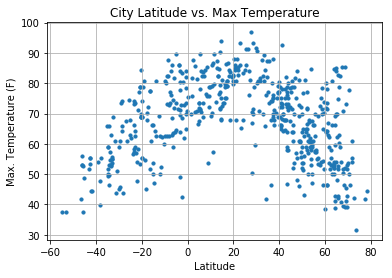

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

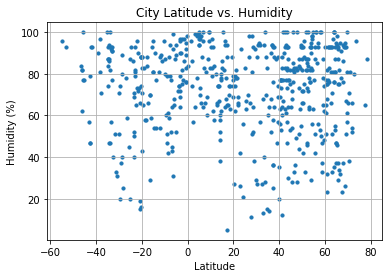

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

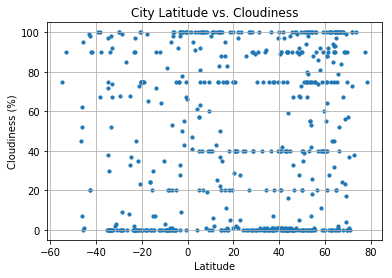

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

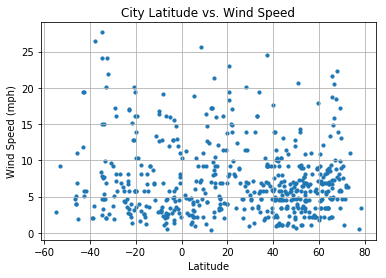

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()